# **Lab 2 - Standard Deviation and Variance**

**Course**: Introduction to Portfolio Construction

**From**: EDHEC on Coursera

**Date**: 13 May 2021


In [ ]:
import numpy as np
import pandas as pd

## **Variance Formula**

$\sigma_R^2 = \frac{1}{N}\sum{(R_i - \bar{R})^2}$, where:

* $\sigma_R^2$: Variance of the returns $R$
* $\sigma_R$: standard deviation of returns $R$
* $R_i$: return at time $i$
* $\bar{R}$: average (arithmetic mean) return
* $N$: Number of time periods (elements)

$\sigma_R = \sqrt{\sigma_R^2}$

Need to annualize volatility in order to compare daily to monthly volatility data

$\sigma_{ann} = \sigma_p\sqrt{p}$
p is the period

## **Sharpe Ratio**

The ratio of excess return for volatility

$ P = \frac{R_p - R_f}{\sigma_p}$, where:

* $P$: Sharpe Ratio
* $R_p$: Return of portfolio
* $R_f$: Return of risk-free asset (treasury bond)


In [ ]:
# price of asset a over 3 days
prices_a = [8.70, 8.91, 8.71]

#return from day 1 to day 2:
print(8.91/8.70 - 1)

#return from day 2 to day 3:
print(8.71/8.91 -1)

0.024137931034482918
-0.022446689113355678


In [ ]:
num = prices_a[1:]          # all except first list item
denom = prices_a[:-1]       # all except last list item

print(num)
print(denom)

[8.91, 8.71]
[8.7, 8.91]


In [ ]:
prices_a = np.array(prices_a)
num = np.array(num)
denom = np.array(denom)

print(prices_a)
print(num)
print(denom)

[8.7  8.91 8.71]
[8.91 8.71]
[8.7  8.91]


In [ ]:
num/denom -1

array([ 0.02413793, -0.02244669])

In [ ]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
                       })

prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [ ]:
# need to use values 
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [ ]:
# method that shifts values down
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


In [ ]:
prices/prices.shift(1)-1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [ ]:
# another method that calculates percentage change automatically
returns = prices.pct_change()

In [ ]:
# import sample price data from csv file
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [ ]:
# calculate percentage changes
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


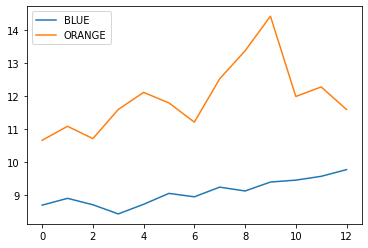

In [ ]:
# plot prices over time
prices.plot()

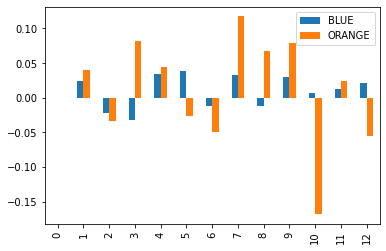

In [ ]:
# plot returns over time
returns.plot.bar()

In [ ]:
# calculate standard deviation
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [ ]:
# calculate average returns
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [ ]:
#calculate total return
(returns+1).prod() - 1  # multiplying each element by previous
# can also use np.prod(return + 1) - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

## **Annualization**

$R_{annualized} = (1 + R_{period})^{periods}$

In [ ]:
rm = 0.01   # monthly return
(1 + rm)**12

1.1268250301319698

In [ ]:
rq = 0.04   # quarterly return
(1 + rq)**4

1.1698585600000002

In [ ]:
rd = 0.0001 # daily return
(1+rd)**252 # 252 trading days in the year

1.0255189119876946